<p style="text-align: center;font-size:35px; color:red;"><b>Machine Learning on Lung Cancer Risk Prediction Dataset</b></p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<p style="text-align: center;font-size:35px; color:red;"><b>Loading Dataset</b></p>

In [2]:
df=pd.read_excel("cancer patient data sets.xlsx")

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Patient has high risk of getting lung cancer ?
0,0,P1,33,1,2,4,5,4,3,2,...,4,2,2,3,1,2,3,4,Low,No
1,1,P10,17,1,3,1,5,3,4,2,...,3,7,8,6,2,1,7,2,Medium,No
2,2,P100,35,1,4,5,6,5,5,4,...,7,9,2,1,4,6,7,2,High,Yes
3,3,P1000,37,1,7,7,7,7,6,7,...,2,3,1,4,5,6,7,5,High,Yes
4,4,P101,46,1,6,8,7,7,7,6,...,2,4,1,4,2,4,2,3,High,Yes


In [4]:
#Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   index                                            1000 non-null   int64 
 1   Patient Id                                       1000 non-null   object
 2   Age                                              1000 non-null   int64 
 3   Gender                                           1000 non-null   int64 
 4   Air Pollution                                    1000 non-null   int64 
 5   Alcohol use                                      1000 non-null   int64 
 6   Dust Allergy                                     1000 non-null   int64 
 7   OccuPational Hazards                             1000 non-null   int64 
 8   Genetic Risk                                     1000 non-null   int64 
 9   chronic Lung Disease                      

<p style="text-align: center;font-size:35px; color:red;"><b>Finding Missing Values</b></p>

In [5]:
#Misiing value
df.isnull().sum()

index                                              0
Patient Id                                         0
Age                                                0
Gender                                             0
Air Pollution                                      0
Alcohol use                                        0
Dust Allergy                                       0
OccuPational Hazards                               0
Genetic Risk                                       0
chronic Lung Disease                               0
Balanced Diet                                      0
Obesity                                            0
Smoking                                            0
Passive Smoker                                     0
Chest Pain                                         0
Coughing of Blood                                  0
Fatigue                                            0
Weight Loss                                        0
Shortness of Breath                           

In [6]:
#finding Duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#garbage value
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***"*10)

Patient Id
P999     1
P1       1
P10      1
P100     1
P1000    1
        ..
P109     1
P108     1
P107     1
P106     1
P105     1
Name: count, Length: 1000, dtype: int64
******************************
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64
******************************
Patient has high risk of  getting lung cancer ?
No     635
Yes    365
Name: count, dtype: int64
******************************


In [8]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


<p style="text-align: center;font-size:35px; color:red;"><b>Detecting Outliers</b></p>

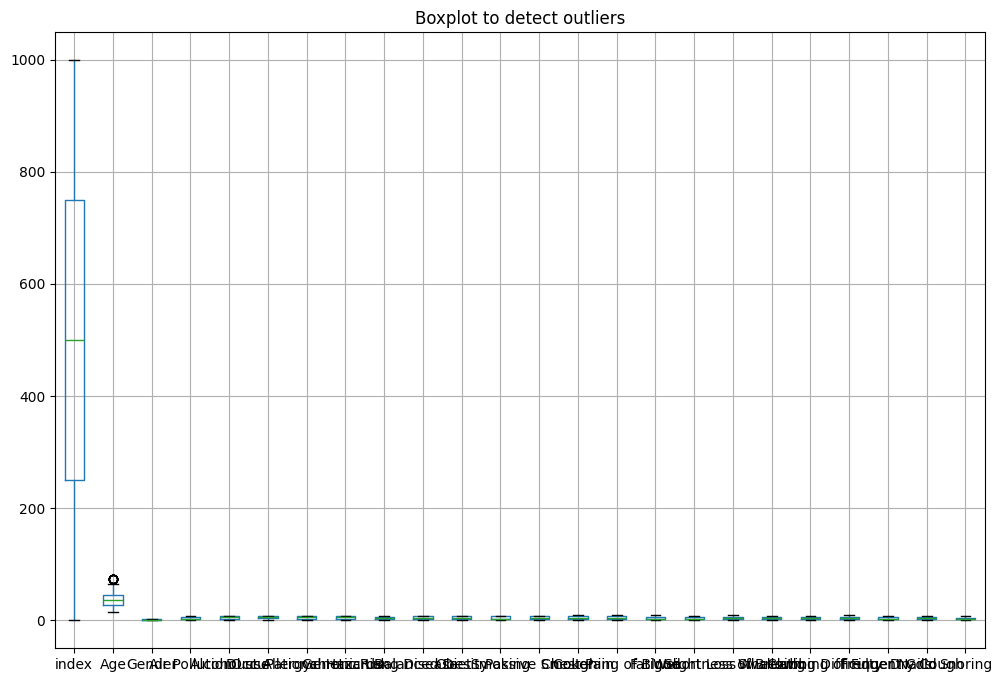

In [9]:
#Outliers
df.boxplot(figsize=(12,8))
plt.title("Boxplot to detect outliers")
plt.show()

<p style="text-align: center;font-size:35px; color:red;"><b>Detecting Correlated Columns</b></p>

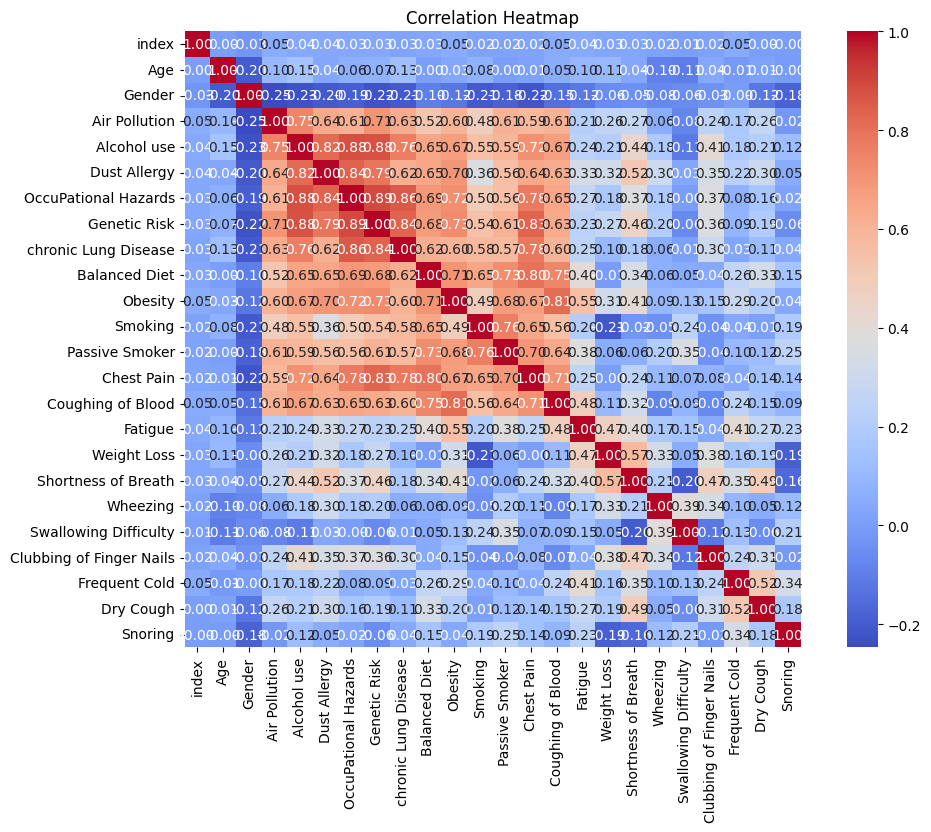

In [10]:
#Correlation
num_df=df.select_dtypes(include=['number'])
cor=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,fmt=".2f",cmap='coolwarm',square=True)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
corr_pairs=cor.unstack().sort_values(ascending=False)
Strong_pairs=corr_pairs[(corr_pairs<0.999)&(corr_pairs>0.7)]
print(Strong_pairs)

Genetic Risk          OccuPational Hazards    0.893049
OccuPational Hazards  Genetic Risk            0.893049
                      Alcohol use             0.878786
Alcohol use           OccuPational Hazards    0.878786
                      Genetic Risk            0.877210
Genetic Risk          Alcohol use             0.877210
chronic Lung Disease  OccuPational Hazards    0.858284
OccuPational Hazards  chronic Lung Disease    0.858284
Genetic Risk          chronic Lung Disease    0.836231
chronic Lung Disease  Genetic Risk            0.836231
OccuPational Hazards  Dust Allergy            0.835860
Dust Allergy          OccuPational Hazards    0.835860
Chest Pain            Genetic Risk            0.831751
Genetic Risk          Chest Pain              0.831751
Alcohol use           Dust Allergy            0.818644
Dust Allergy          Alcohol use             0.818644
Coughing of Blood     Obesity                 0.814805
Obesity               Coughing of Blood       0.814805
Balanced D

In [12]:
df=df.drop(columns=['Passive Smoker','Obesity','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Passive Smoker','Dust Allergy','Level','Patient Id','index'])

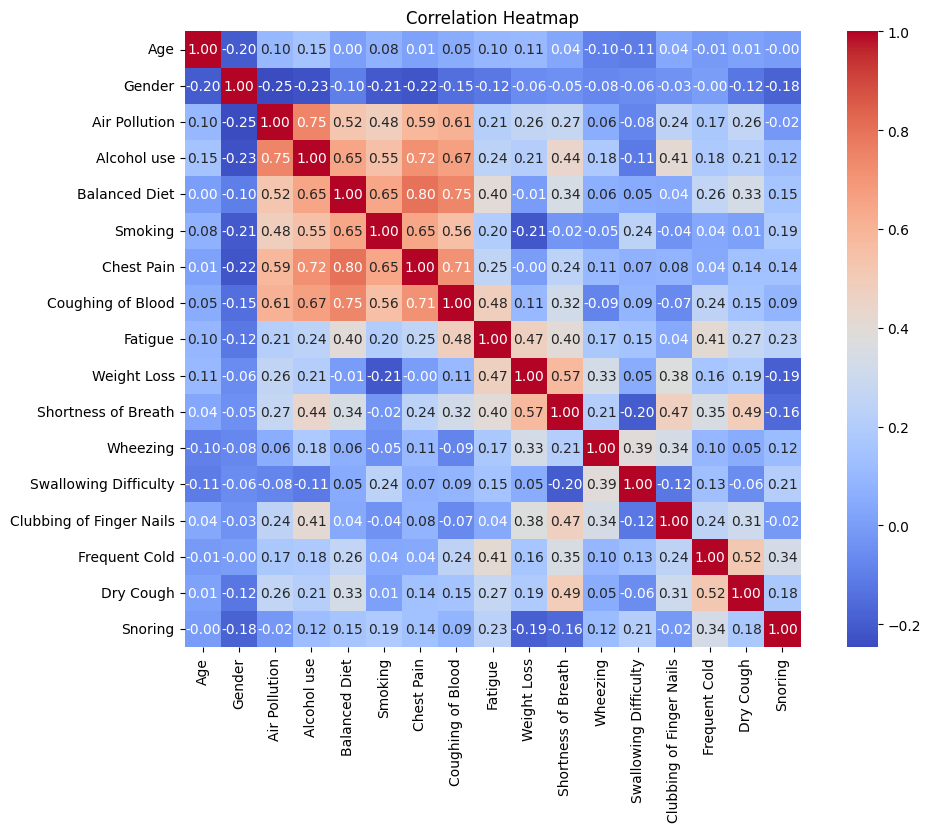

In [13]:
num_df=df.select_dtypes(include=['number'])
cor=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,fmt=".2f",cmap='coolwarm',square=True)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
corr_pairs=cor.unstack().sort_values(ascending=False)
Strong_pairs=corr_pairs[(corr_pairs<0.999)&(corr_pairs>0.7)]
print(Strong_pairs)

Balanced Diet      Chest Pain           0.798207
Chest Pain         Balanced Diet        0.798207
Air Pollution      Alcohol use          0.747293
Alcohol use        Air Pollution        0.747293
Coughing of Blood  Balanced Diet        0.745054
Balanced Diet      Coughing of Blood    0.745054
Alcohol use        Chest Pain           0.717242
Chest Pain         Alcohol use          0.717242
                   Coughing of Blood    0.712158
Coughing of Blood  Chest Pain           0.712158
dtype: float64


In [15]:
df=df.drop(columns=['Balanced Diet','Alcohol use'])

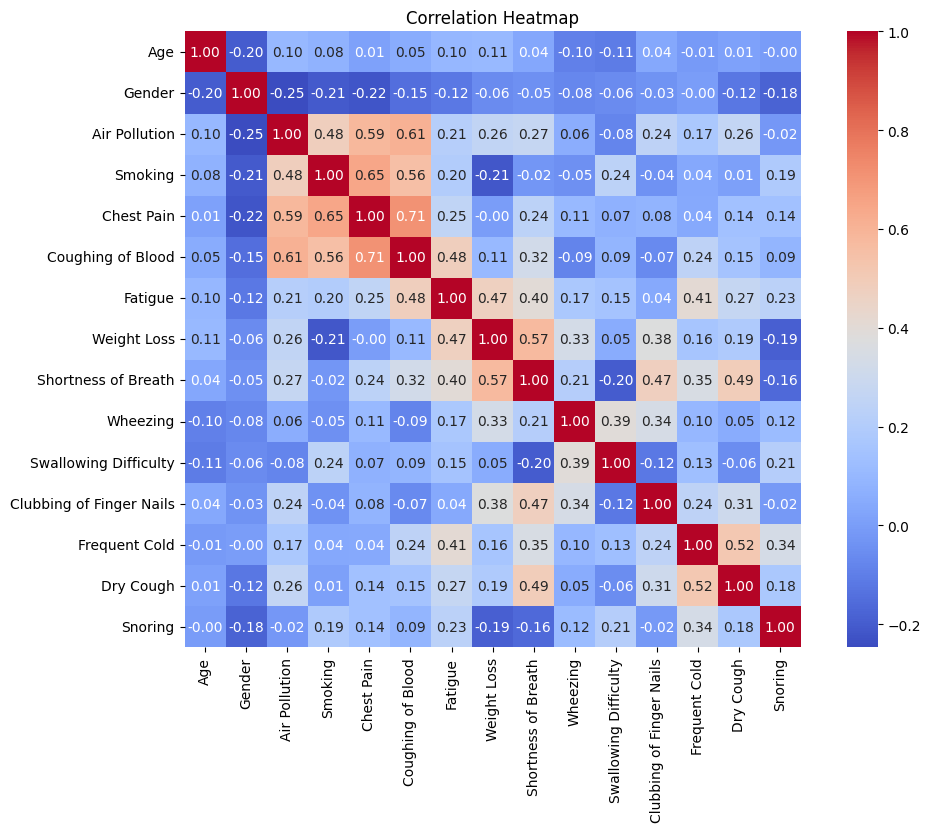

In [16]:
num_df=df.select_dtypes(include=['number'])
cor=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,fmt=".2f",cmap='coolwarm',square=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
corr_pairs=cor.unstack().sort_values(ascending=False)
Strong_pairs=corr_pairs[(corr_pairs<0.999)&(corr_pairs>0.7)]
print(Strong_pairs)

Coughing of Blood  Chest Pain           0.712158
Chest Pain         Coughing of Blood    0.712158
dtype: float64


<p style="text-align: center;font-size:35px; color:red;"><b>Checking Skewness</b></p>

In [18]:
skewness=df.skew(numeric_only=True)
print(skewness)

Age                         0.551096
Gender                      0.400354
Air Pollution               0.125452
Smoking                     0.381312
Chest Pain                  0.164707
Coughing of Blood           0.121997
Fatigue                     0.855630
Weight Loss                 0.355134
Shortness of Breath         0.406383
Wheezing                    0.224155
Swallowing Difficulty       0.451177
Clubbing of Finger Nails    0.796564
Frequent Cold               0.406449
Dry Cough                   0.223835
Snoring                     0.550045
dtype: float64


<p style="text-align: center;font-size:35px; color:red;"><b>Final dataset</b></p>

In [19]:
df

,Age,Gender,Air Pollution,Smoking,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Patient has high risk of getting lung cancer ?
0,33,1,2,3,2,4,3,4,2,2,3,1,2,3,4,No
1,17,1,3,2,2,3,1,3,7,8,6,2,1,7,2,No
2,35,1,4,2,4,8,8,7,9,2,1,4,6,7,2,Yes
3,37,1,7,7,7,8,4,2,3,1,4,5,6,7,5,Yes
4,46,1,6,8,7,9,3,2,4,1,4,2,4,2,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,5,3,2,7,8,2,4,5,3,Yes
996,37,2,6,7,7,7,9,6,5,7,2,4,3,1,4,Yes
997,25,2,4,2,4,8,8,7,9,2,1,4,6,7,2,Yes
998,18,2,6,8,7,9,3,2,4,1,4,2,4,2,3,Yes


<p style="text-align: center;font-size:35px; color:red;"><b>Normalizing and Encoding</b></p>

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
scaler=StandardScaler()
encoder=LabelEncoder()

In [22]:
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Smoking', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring',
       'Patient has high risk of  getting lung cancer ?'],
      dtype='object')


In [23]:
df['Patient has high risk of  getting lung cancer ?'].isnull().sum()

np.int64(0)

In [24]:
df['Patient has high risk of  getting lung cancer ?']=encoder.fit_transform(df['Patient has high risk of  getting lung cancer ?'])

In [25]:
x=df.drop(columns=['Patient has high risk of  getting lung cancer ?'])
y=df['Patient has high risk of  getting lung cancer ?']

In [26]:
x_scaled=scaler.fit_transform(x)

<p style="text-align: center;font-size:35px; color:red;"><b>Logistic Regression</b></p>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [29]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
tn,fp,fn,tp=cm.ravel()
specificity = tn / (tn + fp)
print("Specificity:\n", specificity)
print("Classification Report:\n",classification_report(y_test,y_pred,target_names=["No","Yes"]))

Accuracy: 1.0
Confusion Matrix:
 [[118   0]
 [  0  82]]
Specificity:
 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       118
         Yes       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<p style="text-align: center;font-size:35px; color:red;"><b>MLPClassifier</b></p>

In [31]:
from sklearn.neural_network import MLPClassifier
m=MLPClassifier(hidden_layer_sizes=(16,8),activation='relu',max_iter=300)
m.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=300)

In [32]:
y_predi=m.predict(x_test)
print(classification_report(y_test,y_predi))
cm1=confusion_matrix(y_test,y_predi)
tn,fp,fn,tp=cm1.ravel()
specificity = tn / (tn + fp)
print("Specificity:\n", specificity)
print("Confusion Matrix:\n",cm1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Specificity:
 1.0
Confusion Matrix:
 [[118   0]
 [  0  82]]


<p style="text-align: center;font-size:35px; color:red;"><b>Support Vector Machine</b></p>

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict

In [34]:
svm=SVC(kernel='rbf',probability=True)
cv_scores=cross_val_score(svm,x_scaled,y,cv=10)

In [35]:
print("Accuracy scores of 10-fold cross validation is",cv_scores)
print("Mean Accuracy is",np.mean(cv_scores))

Accuracy scores of 10-fold cross validation is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy is 1.0


In [36]:
y_pre=cross_val_predict(svm,x_scaled,y,cv=10)

In [37]:
print("Confusion matrix on the entire data:\n",confusion_matrix(y,y_pre))
cm2=confusion_matrix(y,y_pre)
tn,fp,fn,tp=cm2.ravel()
specificity = tn / (tn + fp)
print("Specificity:\n", specificity)
print("Classification report:\n",classification_report(y,y_pre))

Confusion matrix on the entire data:
 [[635   0]
 [  0 365]]
Specificity:
 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       635
           1       1.00      1.00      1.00       365

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



<p style="text-align: center;font-size:35px; color:red;"><b>ROC Curve</b></p>

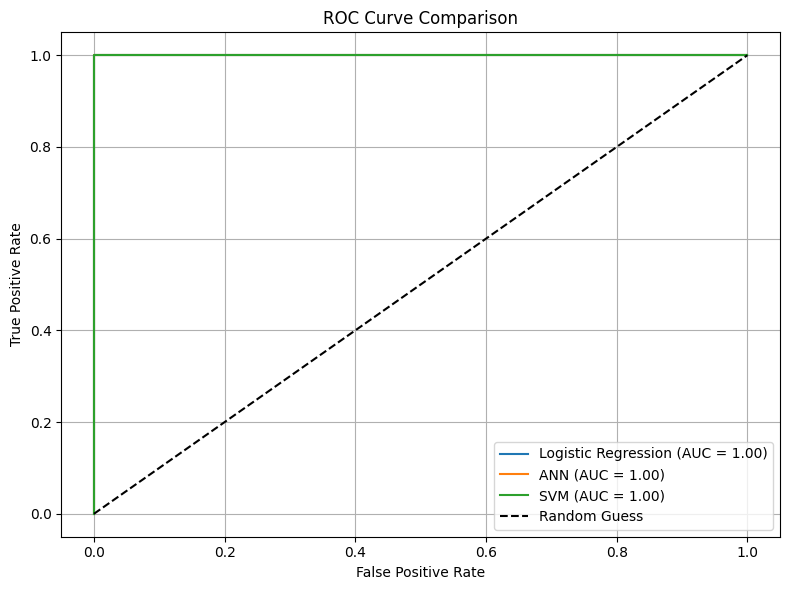

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
#For logistic regression model
y_prob_logreg = model.predict_proba(x_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
auc_log = roc_auc_score(y_test, y_prob_logreg)

#For ANN model
y_prob_ann = m.predict_proba(x_test)[:, 1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)
auc_ann = roc_auc_score(y_test, y_prob_ann)

#For SVM model
vm = SVC(kernel='linear', probability=True)
vm.fit(x_train,y_train)
y_prob_svm = vm.predict_proba(x_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC = {auc_ann:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()